In [105]:
import warnings
import itertools
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [106]:
data = sm.datasets.co2.load_pandas()

y = data.data

In [107]:
# The 'MS' string groups the data in buckets by start of the month
y = y['co2'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())
z = np.log(y)

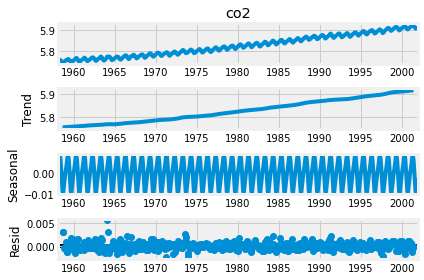

In [108]:
#plt.plot(y)
sm.tsa.seasonal_decompose(z).plot()
plt.show()

In [109]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [116]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

res = []
best_aic = float("inf")


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(z,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            
        aic = results.aic
        #сохраняем лучшую модель, aic, параметры
        if aic < best_aic:
            best_model = results
            best_aic = aic
            best_param = param
            best_seasonal_param = param_seasonal
        res.append([param, param_seasonal, results.aic])

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3342.500596160892
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2614.4427421064565
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-4137.873304135298
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-4251.3084677121415
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-4935.9718688515995
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-4920.580157058421
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-4491.598310052363
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-4796.687334965816
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3342.70225530467
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1907.56864192356
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-4583.650513463058
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-4590.3734149343545
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-5174.716118400396
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-5171.602229030196
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-4683.148385312695
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-4884.846603881935
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-4432.833254630526
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-4726.8460404

In [125]:
print(best_model.summary())
print(best_param)
print(best_seasonal_param)

                                     SARIMAX Results                                      
Dep. Variable:                                co2   No. Observations:                  526
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                2798.082
Date:                            Mon, 11 Oct 2021   AIC                          -5588.165
Time:                                    20:51:43   BIC                          -5571.219
Sample:                                03-01-1958   HQIC                         -5581.521
                                     - 12-01-2001                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3774      0.035    -10.888      0.000      -0.445      -0.309
ar.S.L12       1.0005      0.002   

In [131]:
mod1 = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

mod = sm.tsa.statespace.SARIMAX(z,
                                order=best_param,
                                seasonal_order=best_seasonal_param,
                                enforce_stationarity=False,
                                enforce_invertibility=False)



results1 = mod1.fit()
results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3774      0.035    -10.888      0.000      -0.445      -0.309
ar.S.L12       1.0005      0.002    452.110      0.000       0.996       1.005
ma.S.L12      -0.8162      0.044    -18.580      0.000      -0.902      -0.730
sigma2      9.929e-07   4.79e-08     20.711      0.000    8.99e-07    1.09e-06


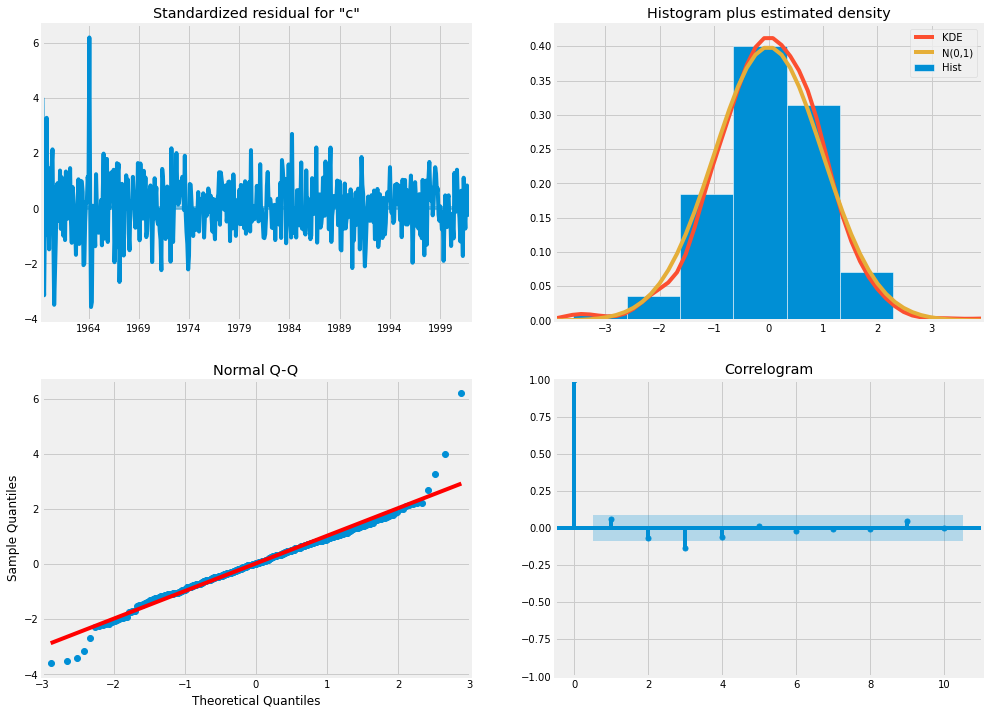

In [133]:
results.plot_diagnostics(figsize=(15, 12))
#results1.plot_diagnostics(figsize=(15, 12))
plt.show()

In [142]:
pred =results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

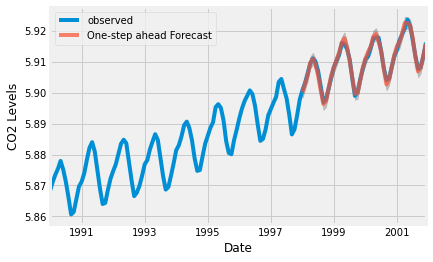

In [143]:
#ax = y['1990':].plot(label='observed')
ax = z['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [100]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


In [101]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

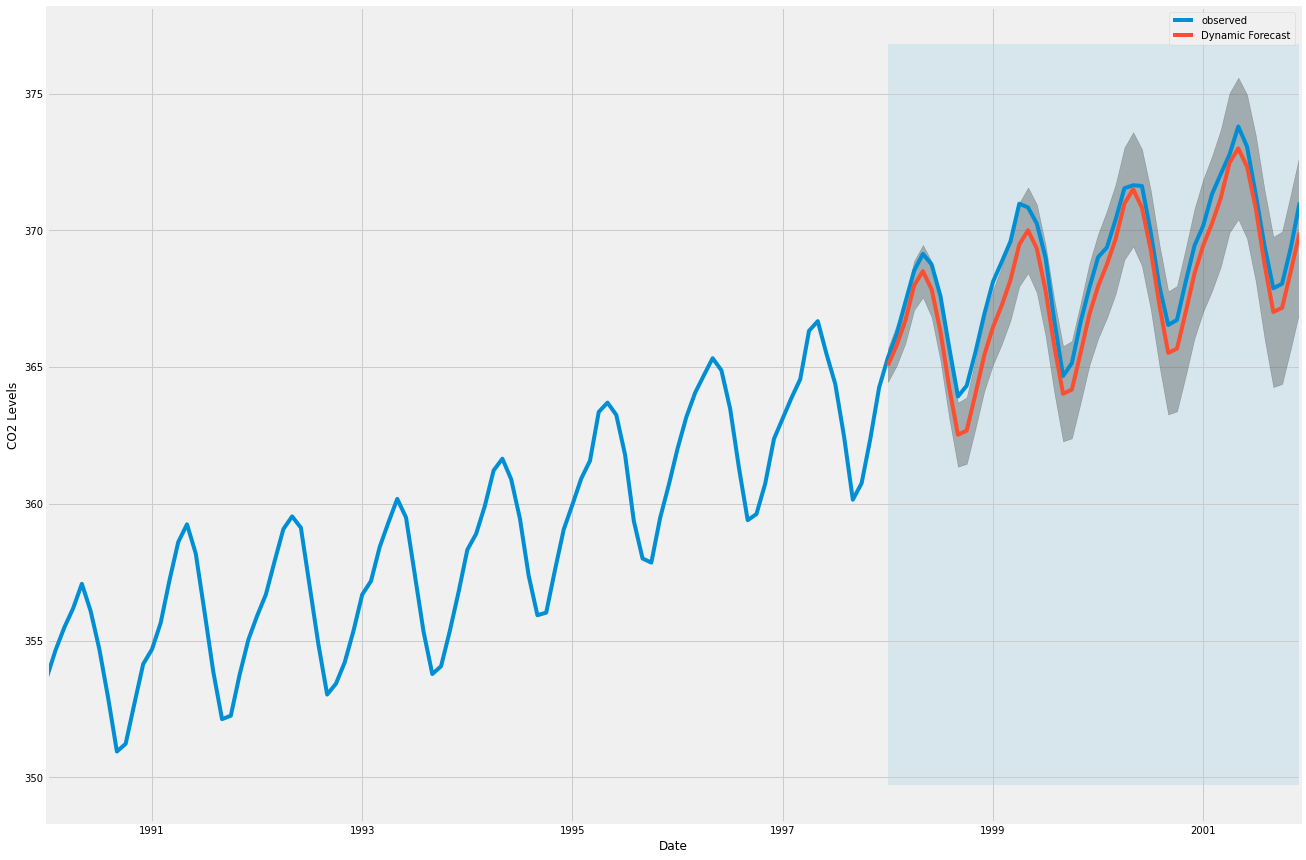

In [102]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()